import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Datasset Description

- id number
- age in days
- age in years
- gender (1 - women, 2 - men)
- height cm
- weight kg
- ap_hi (Systolic blood pressure)
- ap_lo (Diastolic blood pressure)
- cholesterol (1: normal, 2: above normal, 3: well above normal)
- gluc (1: normal, 2: above normal, 3: well above normal)
- smoke (whether patient smokes or not(0 = no, 1 = yes))
- alco Binary feature (0 = no, 1 = yes)
- active Binary feature (0 = passive life, 1 = active life)
- cardio Target variable(0 = no, 1 = yes)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
# import libraries for data preprocessinhg
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# librarie for metrics 
from sklearn.metrics import cohen_kappa_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score #f1 is harmonic mean of precision amd recall
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, confusion_matrix


In [120]:
df=pd.read_csv("capstone_data (1).csv")
df.head()

,Unnamed: 0,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,50.391781,2,168,62.0,110,80,normal,normal,no,no,active,0
1,1,1,20228,55.419178,1,156,85.0,140,90,well above normal,normal,no,no,active,1
2,2,2,18857,51.663014,1,165,64.0,130,70,well above normal,normal,no,no,passive,1
3,3,3,17623,48.282192,2,169,82.0,150,100,normal,normal,no,no,active,1
4,4,4,17474,47.873973,1,156,56.0,100,60,normal,normal,no,no,passive,0


In [4]:
df.head()

,Unnamed: 0,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,50.391781,2,168,62.0,110,80,normal,normal,no,no,active,0
1,1,1,20228,55.419178,1,156,85.0,140,90,well above normal,normal,no,no,active,1
2,2,2,18857,51.663014,1,165,64.0,130,70,well above normal,normal,no,no,passive,1
3,3,3,17623,48.282192,2,169,82.0,150,100,normal,normal,no,no,active,1
4,4,4,17474,47.873973,1,156,56.0,100,60,normal,normal,no,no,passive,0


In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,70000.0,34999.500000,20207.403759,0.000000,17499.750000,34999.500000,52499.250000,69999.000000
id,70000.0,49972.419900,28851.302323,0.000000,25006.750000,50001.500000,74889.250000,99999.000000
age_days,70000.0,19468.865814,2467.251667,10798.000000,17664.000000,19703.000000,21327.000000,23713.000000
age_year,70000.0,53.339358,6.759594,29.583562,48.394521,53.980822,58.430137,64.967123
gender,70000.0,1.349571,0.476838,1.000000,1.000000,1.000000,2.000000,2.000000
height,70000.0,164.359229,8.210126,55.000000,159.000000,165.000000,170.000000,250.000000
weight,70000.0,74.205690,14.395757,10.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,70000.0,128.817286,154.011419,-150.000000,120.000000,120.000000,140.000000,16020.000000
ap_lo,70000.0,96.630414,188.472530,-70.000000,80.000000,80.000000,90.000000,11000.000000
cardio,70000.0,0.499700,0.500003,0.000000,0.000000,0.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age_days     70000 non-null  int64  
 3   age_year     70000 non-null  float64
 4   gender       70000 non-null  int64  
 5   height       70000 non-null  int64  
 6   weight       70000 non-null  float64
 7   ap_hi        70000 non-null  int64  
 8   ap_lo        70000 non-null  int64  
 9   cholesterol  70000 non-null  object 
 10  gluc         70000 non-null  object 
 11  smoke        70000 non-null  object 
 12  alco         70000 non-null  object 
 13  active       70000 non-null  object 
 14  cardio       70000 non-null  int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 8.0+ MB


In [7]:
df.isnull().sum()

Unnamed: 0     0
id             0
age_days       0
age_year       0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
#Dropping unnecessary columns
df.drop("Unnamed: 0",axis = 1,inplace=True)
df.drop("id",axis = 1,inplace = True)
df.drop("age_days",axis = 1,inplace = True)

In [9]:
df["cholesterol"]=df["cholesterol"].replace(to_replace="well above normal",value="high")
df["cholesterol"]=df["cholesterol"].replace(to_replace="above normal",value="borderline high")

In [10]:
df_num=df[['age_year', 'height', 'weight', 'ap_hi','ap_lo']]
df_num.head()

,age_year,height,weight,ap_hi,ap_lo
0,50.391781,168,62.0,110,80
1,55.419178,156,85.0,140,90
2,51.663014,165,64.0,130,70
3,48.282192,169,82.0,150,100
4,47.873973,156,56.0,100,60


In [11]:
df_num.skew()

age_year    -0.307055
height      -0.642187
weight       1.012070
ap_hi       85.296214
ap_lo       32.114083
dtype: float64

## Univariate analysis

### 1.Numerical Columns

In [12]:
df.select_dtypes(include=np.number).columns

Index(['age_year', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cardio'], dtype='object')

In [13]:
plt.rcParams['figure.figsize']=[15,8]

C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

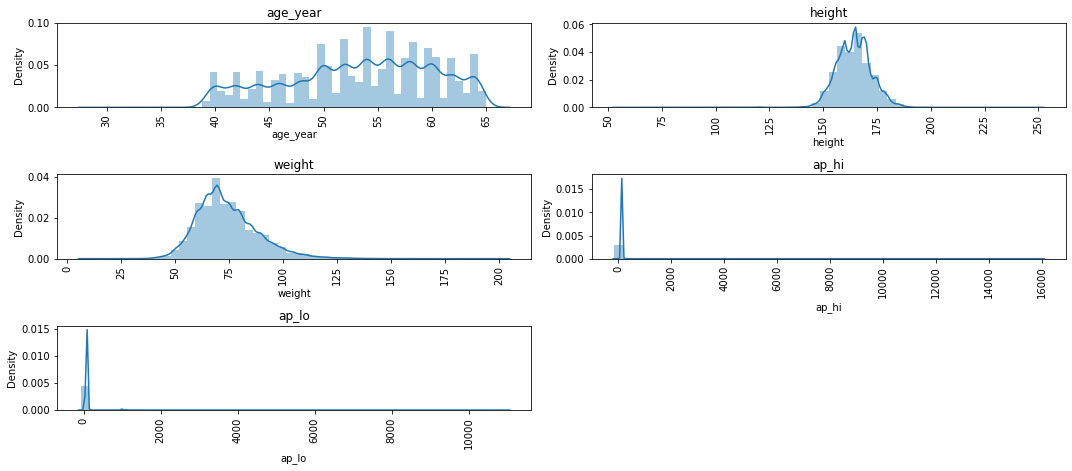

In [14]:
cols=['age_year', 'height', 'weight', 'ap_hi','ap_lo']
rows=4
columns=2
iterator=1
for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.distplot(df.loc[:,i],kde=True)
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

### Inference:
- **age_year:** This columns are looking uniformly distributed with multiple modes. For this columns we can do **binning** to make them simple to understand. But at the same time both are giving same information, so we can treat age_days as unnecessary column and drop it.
- **height and weight:** This columns are looking nearly normally distributed. From this columns we can make new column as bmi to get information more comprehensive and drop them.
- **ap_hi and ap_lo:** This columns have very low range and have some outliers. Thats why they are looking skewed.
In adults, blood pressure is considered to be normal under a systolic value of 140 mmHg and under a diastolic value of 90 mm

In [15]:
#Feature engineering
df["bmi"]=df.weight/(df.height/100)**2
df.bmi.head()

0    21.967120
1    34.927679
2    23.507805
3    28.710479
4    23.011177
Name: bmi, dtype: float64

In [16]:
df=df.drop(["weight","height"],axis=1)

In [17]:
df.head()

,age_year,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,2,110,80,normal,normal,no,no,active,0,21.967120
1,55.419178,1,140,90,high,normal,no,no,active,1,34.927679
2,51.663014,1,130,70,high,normal,no,no,passive,1,23.507805
3,48.282192,2,150,100,normal,normal,no,no,active,1,28.710479
4,47.873973,1,100,60,normal,normal,no,no,passive,0,23.011177


### 2.Categorical Columns

In [18]:
df.select_dtypes(include=object).columns

Index(['cholesterol', 'gluc', 'smoke', 'alco', 'active'], dtype='object')

C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\N

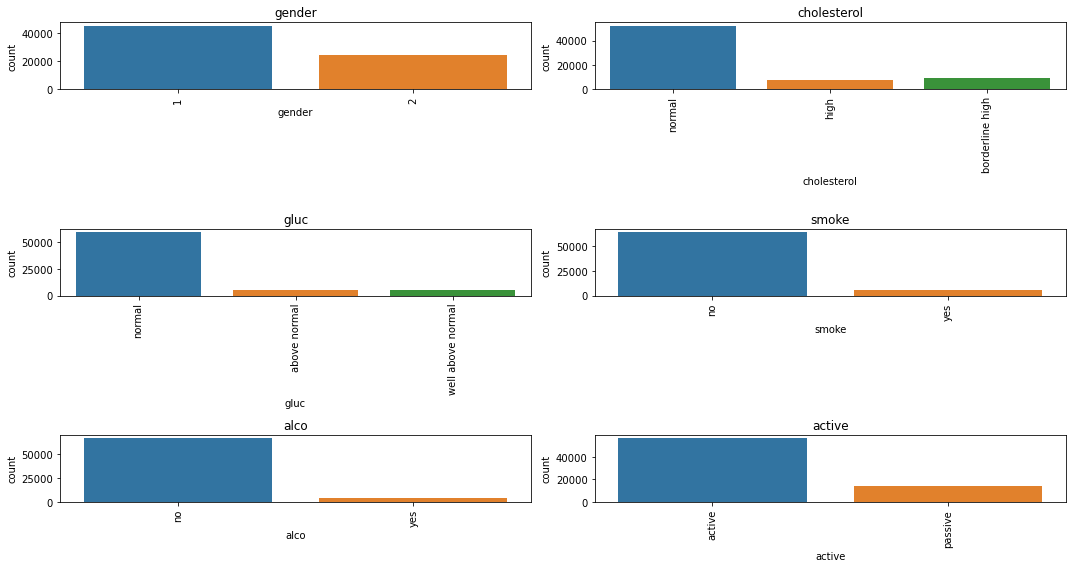

In [19]:
cols=['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
rows=3
columns=2
iterator=1
for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.countplot(df.loc[:,i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
    

### Inference:
- **gender:** The dataset is not balanced as per the gender and there are more females in the dataset than male.
- **cholesterol and gluc:** As we can see,most of the participants with cholesterol and glucose are of normal level than above normal amd well above normal.
- **smoke and alco:** Most of the participants are non smokers and non alcoholic.
- **active:** There are more participants with active life than passive.

In [20]:
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

**Inference:** From above we can say that, cardio disease is more related with age_year, weight and cholesterol.


In [21]:
df.isnull().sum()[df.isnull().sum()!=0] #no missing values

Series([], dtype: int64)

# Bivariate Analysis 

In [22]:
#Numerical columns

C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

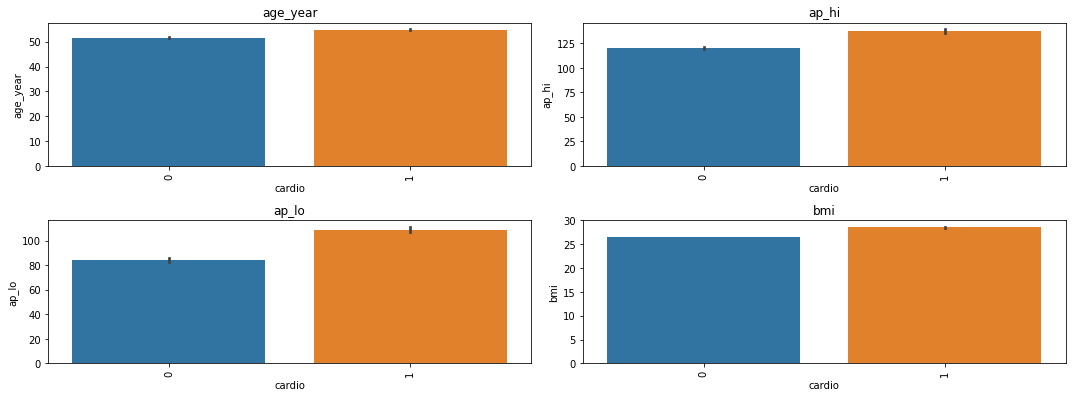

In [23]:
cols=["age_year","ap_hi","ap_lo","bmi"]
rows=3
columns=2
iterator=1
for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.barplot(df.cardio,df.loc[:,i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [24]:
#Categorical variables

C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\N

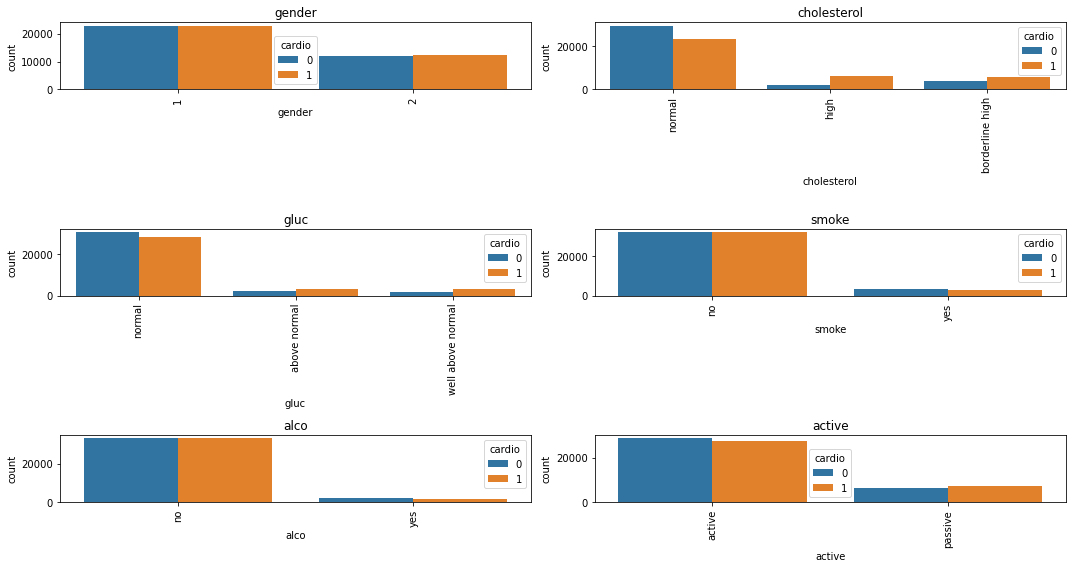

In [25]:
cols=['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
rows=3
columns=2
iterator=1
for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.countplot(df.loc[:,i],hue=df.cardio)
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
    

In [26]:
#As we can see that cardio is not depend on gender of person so we can drop it

In [27]:
df.head()

,age_year,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,2,110,80,normal,normal,no,no,active,0,21.967120
1,55.419178,1,140,90,high,normal,no,no,active,1,34.927679
2,51.663014,1,130,70,high,normal,no,no,passive,1,23.507805
3,48.282192,2,150,100,normal,normal,no,no,active,1,28.710479
4,47.873973,1,100,60,normal,normal,no,no,passive,0,23.011177


In [28]:
df=df.drop(["gender"],axis=1)
df.head()

,age_year,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,110,80,normal,normal,no,no,active,0,21.967120
1,55.419178,140,90,high,normal,no,no,active,1,34.927679
2,51.663014,130,70,high,normal,no,no,passive,1,23.507805
3,48.282192,150,100,normal,normal,no,no,active,1,28.710479
4,47.873973,100,60,normal,normal,no,no,passive,0,23.011177


In [29]:
#Multivariate analysis

<AxesSubplot:>

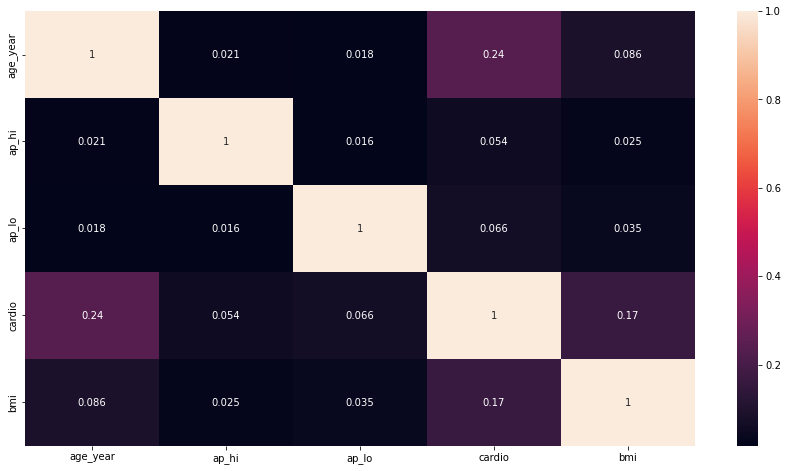

In [30]:
X=df.corr()
X
sns.heatmap(X,annot=True)

## Outlier Treatment

<AxesSubplot:>

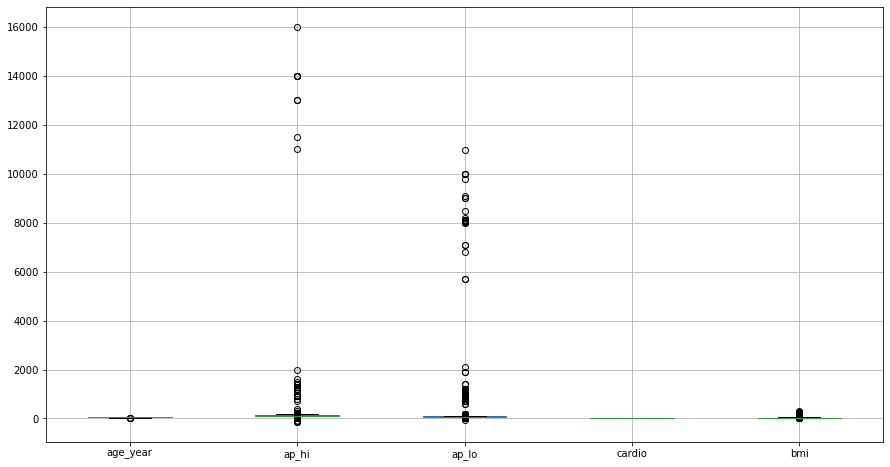

In [31]:
df.boxplot()

In [32]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

upperfense = Q3+3*IQR
lowerfense = Q1-3*IQR
print(upperfense)
print(lowerfense)

age_year     88.536986
ap_hi       200.000000
ap_lo       120.000000
cardio        4.000000
bmi          49.263545
dtype: float64
age_year    18.287671
ap_hi       60.000000
ap_lo       50.000000
cardio      -3.000000
bmi          4.833792
dtype: float64


In [33]:
df=df[~((df>upperfense)|(df<lowerfense)).any(axis=1)]
df.shape

C:\Users\Nilesh Patil\AppData\Local\Temp\ipykernel_15052\2609896590.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df>upperfense)|(df<lowerfense)).any(axis=1)]


(68351, 10)

<AxesSubplot:>

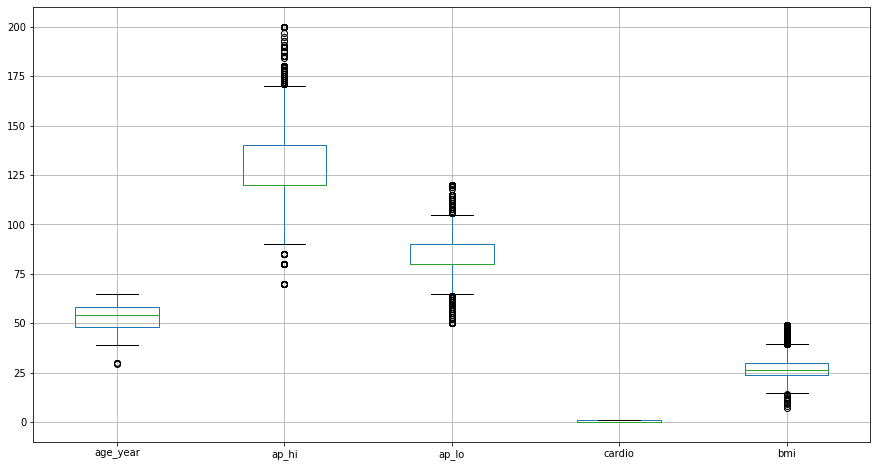

In [34]:
df.boxplot()

# Multivariate analysis

<AxesSubplot:>

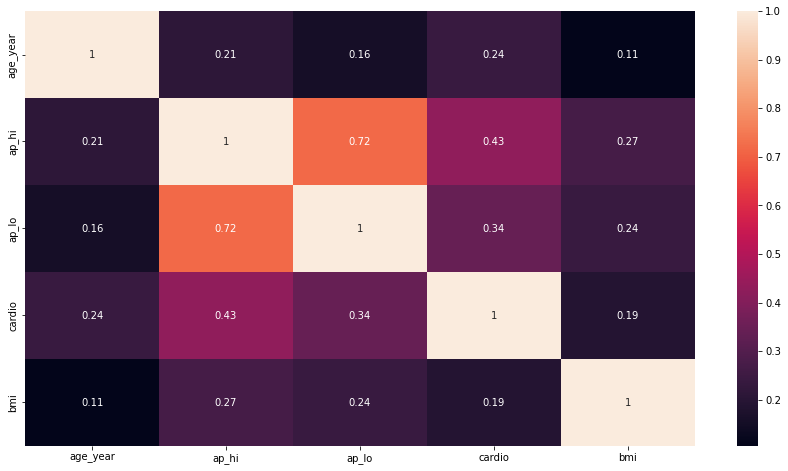

In [35]:
X=df.corr()
X
sns.heatmap(X,annot=True)

In [36]:
df.head()

,age_year,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,110,80,normal,normal,no,no,active,0,21.967120
1,55.419178,140,90,high,normal,no,no,active,1,34.927679
2,51.663014,130,70,high,normal,no,no,passive,1,23.507805
3,48.282192,150,100,normal,normal,no,no,active,1,28.710479
4,47.873973,100,60,normal,normal,no,no,passive,0,23.011177


# Scaling and Transformation

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [38]:
df_cat=df[["cholesterol","gluc","smoke","alco","active","cardio"]]
df_cat.shape

(68351, 6)

In [39]:
df_num=df[["age_year","ap_hi","ap_lo","bmi"]]
df_num.head()

,age_year,ap_hi,ap_lo,bmi
0,50.391781,110,80,21.967120
1,55.419178,140,90,34.927679
2,51.663014,130,70,23.507805
3,48.282192,150,100,28.710479
4,47.873973,100,60,23.011177


In [93]:
scaled=pd.DataFrame(sc.fit_transform(df_num), columns=df_num.columns) #return array
scaled.head(10)

,age_year,ap_hi,ap_lo,bmi
0,-0.433435,-1.002596,-0.136398,-1.075423
1,0.309894,0.818762,0.936638,1.506656
2,-0.245476,0.211643,-1.209435,-0.768479
3,-0.745349,1.425882,2.009675,0.268029
4,-0.805707,-1.609715,-2.282472,-0.867420
5,0.992866,-0.395476,-0.136398,0.402346
6,1.073478,0.211643,-0.136398,2.064896
7,1.264272,0.211643,0.936638,0.521665
8,-0.727121,-1.002596,-1.209435,0.214332
9,0.150291,-1.002596,-2.282472,-0.414900


In [41]:
df_scaled=pd.concat([scaled,df_cat],axis=1)

In [42]:
df_scaled

,age_year,ap_hi,ap_lo,bmi,cholesterol,gluc,smoke,alco,active,cardio
0,-0.433435,-1.002596,-0.136398,-1.075423,normal,normal,no,no,active,0.0
1,0.309894,0.818762,0.936638,1.506656,high,normal,no,no,active,1.0
2,-0.245476,0.211643,-1.209435,-0.768479,high,normal,no,no,passive,1.0
3,-0.745349,1.425882,2.009675,0.268029,normal,normal,no,no,active,1.0
4,-0.805707,-1.609715,-2.282472,-0.867420,normal,normal,no,no,passive,0.0
...,...,...,...,...,...,...,...,...,...,...
69994,NaN,NaN,NaN,NaN,normal,normal,no,no,active,1.0
69995,NaN,NaN,NaN,NaN,normal,normal,yes,no,active,0.0
69997,NaN,NaN,NaN,NaN,high,normal,no,yes,passive,1.0
69998,NaN,NaN,NaN,NaN,normal,above normal,no,no,passive,1.0


In [43]:
df_scaled.isnull().sum()

age_year       1607
ap_hi          1607
ap_lo          1607
bmi            1607
cholesterol    1607
gluc           1607
smoke          1607
alco           1607
active         1607
cardio         1607
dtype: int64

In [44]:
df_scaled.dropna()

,age_year,ap_hi,ap_lo,bmi,cholesterol,gluc,smoke,alco,active,cardio
0,-0.433435,-1.002596,-0.136398,-1.075423,normal,normal,no,no,active,0.0
1,0.309894,0.818762,0.936638,1.506656,high,normal,no,no,active,1.0
2,-0.245476,0.211643,-1.209435,-0.768479,high,normal,no,no,passive,1.0
3,-0.745349,1.425882,2.009675,0.268029,normal,normal,no,no,active,1.0
4,-0.805707,-1.609715,-2.282472,-0.867420,normal,normal,no,no,passive,0.0
...,...,...,...,...,...,...,...,...,...,...
68346,0.652595,1.425882,-0.136398,0.402362,normal,normal,no,no,passive,1.0
68347,-0.090329,-0.395476,-0.136398,-0.087199,borderline high,normal,no,no,active,1.0
68348,-0.160813,3.247240,0.936638,0.794603,normal,normal,no,no,active,0.0
68349,1.202294,0.515203,-0.136398,-0.052970,normal,normal,no,no,passive,0.0


In [45]:
df_scaled.skew()

C:\Users\Nilesh Patil\AppData\Local\Temp\ipykernel_15052\1985168545.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scaled.skew()


age_year   -0.304662
ap_hi       0.814104
ap_lo       0.253519
bmi         0.957243
cardio      0.025723
dtype: float64

C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

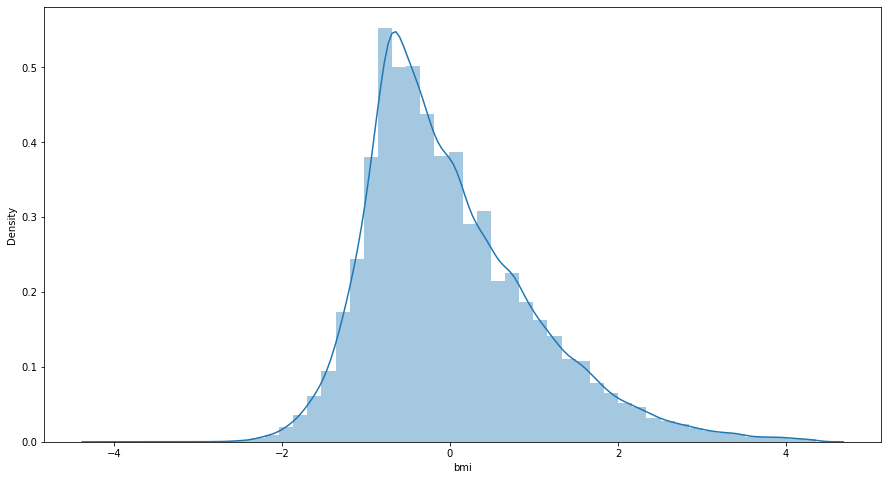

In [46]:
sns.distplot(df_scaled.bmi)

#  Encoding

In [80]:
df["cholesterol"]=df["cholesterol"].replace(to_replace="high",value=3)
df["cholesterol"]=df["cholesterol"].replace(to_replace="borderline high",value=2)
df["cholesterol"]=df["cholesterol"].replace(to_replace="normal",value=1)

In [72]:
df["gluc"]=df["gluc"].replace(to_replace="well above normal",value=3)
df["gluc"]=df["gluc"].replace(to_replace="above normal",value=2)
df["gluc"]=df["gluc"].replace(to_replace="normal",value=1)

In [73]:
df["smoke"]=df["smoke"].replace(to_replace="no",value=0)
df["smoke"]=df["smoke"].replace(to_replace="yes",value=1)


In [74]:
df["alco"]=df["alco"].replace(to_replace="no",value=0)
df["alco"]=df["alco"].replace(to_replace="yes",value=1)

In [75]:
df["active"]=df["active"].replace(to_replace="passive",value=0)
df["active"]=df["active"].replace(to_replace="active",value=1)


In [52]:
df_scaled.head()

,age_year,ap_hi,ap_lo,bmi,cholesterol,gluc,smoke,alco,active,cardio
0,-0.433435,-1.002596,-0.136398,-1.075423,1.0,1.0,0.0,0.0,1.0,0.0
1,0.309894,0.818762,0.936638,1.506656,3.0,1.0,0.0,0.0,1.0,1.0
2,-0.245476,0.211643,-1.209435,-0.768479,3.0,1.0,0.0,0.0,0.0,1.0
3,-0.745349,1.425882,2.009675,0.268029,1.0,1.0,0.0,0.0,1.0,1.0
4,-0.805707,-1.609715,-2.282472,-0.867420,1.0,1.0,0.0,0.0,0.0,0.0


In [53]:
df_scaled.isnull().sum()

age_year       1607
ap_hi          1607
ap_lo          1607
bmi            1607
cholesterol    1607
gluc           1607
smoke          1607
alco           1607
active         1607
cardio         1607
dtype: int64

In [54]:
df_scaled=df_scaled.dropna()

In [55]:
df_scaled.reset_index()

,index,age_year,ap_hi,ap_lo,bmi,cholesterol,gluc,smoke,alco,active,cardio
0,0,-0.433435,-1.002596,-0.136398,-1.075423,1.0,1.0,0.0,0.0,1.0,0.0
1,1,0.309894,0.818762,0.936638,1.506656,3.0,1.0,0.0,0.0,1.0,1.0
2,2,-0.245476,0.211643,-1.209435,-0.768479,3.0,1.0,0.0,0.0,0.0,1.0
3,3,-0.745349,1.425882,2.009675,0.268029,1.0,1.0,0.0,0.0,1.0,1.0
4,4,-0.805707,-1.609715,-2.282472,-0.867420,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
66739,68346,0.652595,1.425882,-0.136398,0.402362,1.0,1.0,0.0,0.0,0.0,1.0
66740,68347,-0.090329,-0.395476,-0.136398,-0.087199,2.0,1.0,0.0,0.0,1.0,1.0
66741,68348,-0.160813,3.247240,0.936638,0.794603,1.0,1.0,0.0,0.0,1.0,0.0
66742,68349,1.202294,0.515203,-0.136398,-0.052970,1.0,1.0,0.0,0.0,0.0,0.0


In [81]:
df.head()

,age_year,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,110,80,1,1,0,0,1,0,21.967120
1,55.419178,140,90,3,1,0,0,1,1,34.927679
2,51.663014,130,70,3,1,0,0,0,1,23.507805
3,48.282192,150,100,1,1,0,0,1,1,28.710479
4,47.873973,100,60,1,1,0,0,0,0,23.011177


# Splitting data 

In [82]:
X = df.drop("cardio",axis=1)
y = df["cardio"]

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (47845, 9) (47845,)
Test set: (20506, 9) (20506,)


# KNeighborsClassifier

In [115]:
from sklearn.neighbors import KNeighborsClassifier
# K = 2 because of cardio (target value 0/1)
model = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [116]:
### Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("KNeighborsClassifier")
print(cm)
print('Accurancy: {:.0f}%'.format(model.score(X_test, y_test)*100))
print("f1_score",f1_score(y_test,y_pred)*100)
print("cohen",cohen_kappa_score(y_test,y_pred))

print("Classification report",classification_report(y_test,y_pred))
print("cohen",classification_report(y_test,y_pred))


KNeighborsClassifier
[[8654 1718]
 [5568 4566]]
Accurancy: 64%
f1_score 55.621878426117675
cohen 0.2861715631216992
Classification report               precision    recall  f1-score   support

           0       0.61      0.83      0.70     10372
           1       0.73      0.45      0.56     10134

    accuracy                           0.64     20506
   macro avg       0.67      0.64      0.63     20506
weighted avg       0.67      0.64      0.63     20506

cohen               precision    recall  f1-score   support

           0       0.61      0.83      0.70     10372
           1       0.73      0.45      0.56     10134

    accuracy                           0.64     20506
   macro avg       0.67      0.64      0.63     20506
weighted avg       0.67      0.64      0.63     20506



# Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train=classifier.predict(X_train)

In [111]:
### Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Naive Bayes")
print(cm)
print('Accurancy: {:.0f}%'.format(classifier.score(X_test, y_test)*100))
print("f1_score",f1_score(y_test,y_pred)*100)
print("Classification report train data\n",classification_report(y_train,y_pred_train))
print("Classification report\n",classification_report(y_test,y_pred))

Naive Bayes
[[7548 2824]
 [3216 6918]]
Accurancy: 72%
f1_score 69.61159186959146
Classification report train data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24243
           1       1.00      1.00      1.00     23602

    accuracy                           1.00     47845
   macro avg       1.00      1.00      1.00     47845
weighted avg       1.00      1.00      1.00     47845

Classification report
               precision    recall  f1-score   support

           0       0.70      0.73      0.71     10372
           1       0.71      0.68      0.70     10134

    accuracy                           0.71     20506
   macro avg       0.71      0.71      0.71     20506
weighted avg       0.71      0.71      0.71     20506



# DecisionTree

In [106]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)
y_pred_train=model_tree.predict(X_train)

In [107]:
cm = confusion_matrix(y_test, y_pred)
print("DecisionTree")
print(cm)
print('Accurancy: {:.0f}%'.format(model_tree.score(X_test, y_test)*100))
print("f1_score",f1_score(y_test,y_pred)*100)
print("Classification report train data\n",classification_report(y_train,y_pred_train))

print("Classification report\n",classification_report(y_test,y_pred))

DecisionTree
[[7995 2377]
 [3198 6936]]
Accurancy: 73%
f1_score 71.33233917827943
Classification report train data
               precision    recall  f1-score   support

           0       0.74      0.79      0.76     24243
           1       0.76      0.71      0.74     23602

    accuracy                           0.75     47845
   macro avg       0.75      0.75      0.75     47845
weighted avg       0.75      0.75      0.75     47845

Classification report
               precision    recall  f1-score   support

           0       0.71      0.77      0.74     10372
           1       0.74      0.68      0.71     10134

    accuracy                           0.73     20506
   macro avg       0.73      0.73      0.73     20506
weighted avg       0.73      0.73      0.73     20506



# RandomForestClassifier

In [108]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test).round(0)
y_pred_train=model_rf.predict(X_train)

In [110]:
cm = confusion_matrix(y_test, y_pred)
print("Random Forest")
print(cm)
print('Accurancy: {:.0f}%'.format(model_rf.score(X_test, y_test)*100))
print("f1_score",f1_score(y_test,y_pred)*100)
print("Classification report train data\n",classification_report(y_train,y_pred_train))

print("Classification report \n", classification_report(y_test,y_pred))

Random Forest
[[7548 2824]
 [3216 6918]]
Accurancy: 71%
f1_score 69.61159186959146
Classification report train data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24243
           1       1.00      1.00      1.00     23602

    accuracy                           1.00     47845
   macro avg       1.00      1.00      1.00     47845
weighted avg       1.00      1.00      1.00     47845

Classification report 
               precision    recall  f1-score   support

           0       0.70      0.73      0.71     10372
           1       0.71      0.68      0.70     10134

    accuracy                           0.71     20506
   macro avg       0.71      0.71      0.71     20506
weighted avg       0.71      0.71      0.71     20506



# Another way - need to complete

In [66]:
def metrics(y_test,y_pred,model_name):
    print("The metrics for the model",model_name)
    print('')
    print("Accuracy score:",accuracy_score(y_test,y_pred))
    print('')
        

    print("recall score:",recall_score(y_test,y_pred))
    print('')

    print("precision score:",precision_score(y_test,y_pred))
    print('')

    print("f1 score:",f1_score(y_test,y_pred))
    print('')

    print("roc auc score:",roc_auc_score(y_test,y_pred))
    
    print("Classification Report")
    print(classification_report(y_test,y_pred))

In [67]:
def plot_metrics(clf,x_test,y_test):
    plot_confusion_matrix(clf,x_test,y_test,display_labels=[0,1])
    plot_roc_curve(clf,x_test,y_test)
    plot_precision_recall_curve(clf,x_test,y_test)

In [68]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
metrics(y_test,y_pred,"KNN")

The metrics for the model KNN

Accuracy score: 0.5432481022772673

recall score: 0.5243717832273691

precision score: 0.5396198982241146

f1 score: 0.5318865799979526

roc auc score: 0.5430558866705308
Classification Report
              precision    recall  f1-score   support

         0.0       0.55      0.56      0.55     10115
         1.0       0.54      0.52      0.53      9909

    accuracy                           0.54     20024
   macro avg       0.54      0.54      0.54     20024
weighted avg       0.54      0.54      0.54     20024



In [69]:
#plot model complexity score
neighbors=np.arange(1,20)
train=np.empty(len(neighbors))
test=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(k)
    knn.fit(x_train,y_train)
    train[i]=knn.score(x_train,y_train)
    test[i]=knn.score(x_test,y_test)
    
plt.title("KNN model complete plots")
plt.plot(neighbors,train,label="Train Accuracies")
plt.plot(neighbors,test,label="Test Accuracies")
plt.legend()
plt.xlabel("K values")
plt.ylabel("Accuracy score")
plt.show()

NameError: name 'x_train' is not defined

In [ ]:
# fit a random forest model and optimize
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
metrics(y_test,y_pred,"RFC")

In [ ]:
plot_metrics(rfc,x_test,y_test)

In [ ]:
clfs={
    "Logreg":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Naive Beyes":GaussianNB(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Ada boost":AdaBoostClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "xgboost":XGBClassifier()
}
models_report=pd.DataFrame(columns=["model","accuracy","recall","precision","roc auc","f1 score"])


for clf,clf_name in list(zip(clfs.values(),clfs.keys())):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print("Fitting the model...",clf_name)
    t={
        "model name":clf_name,
        "accuracy":accuracy_score(y_test,y_pred),
        "recall":recall_score(y_test,y_pred),
        "precision":precision_score(y_test,y_pred),
        "roc auc":roc_auc_score(y_test,y_pred),
        "f1 score":f1_score(y_test,y_pred)
    }
    models_report=models_report.append(t,ignore_index=True)
models_report=models_report.sort_values(by="f1 score",ascending=False)
models_report

In [ ]:
param_grid={
    "n_estimators":[100,200],
    "min_samples_leaf":range(1,5,1),
    "min_samples_split":range(2,10,2),
    "max_features":["sqrt","log2"],
    "criterion":["gini","entropy"]
   # "max_depth":[2,4,None]
    
}

n_folds=3
cv=GridSearchCV(estimator=rfc,cv=n_folds,param_grid=param_grid,verbose=3,return_train_score=False,n_jobs=-1)
cv.fit(x_train,y_train)

In [ ]:
cv.best_score_

In [ ]:
cv.best_params_

In [ ]:
cv.best_estimator_

In [117]:
df.head()

,age_year,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,110,80,1,1,0,0,1,0,21.967120
1,55.419178,140,90,3,1,0,0,1,1,34.927679
2,51.663014,130,70,3,1,0,0,0,1,23.507805
3,48.282192,150,100,1,1,0,0,1,1,28.710479
4,47.873973,100,60,1,1,0,0,0,0,23.011177


C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

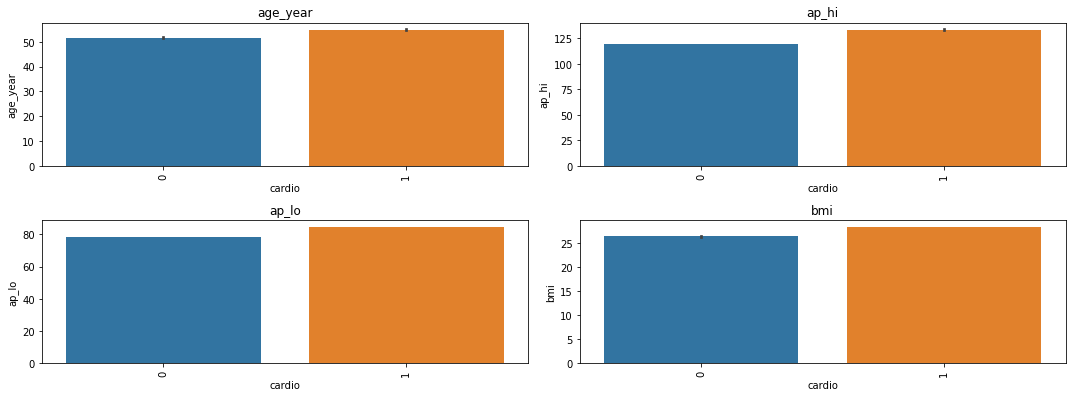

In [118]:
cols=["age_year","ap_hi","ap_lo","bmi"]
rows=3
columns=2
iterator=1
for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.barplot(df.cardio,df.loc[:,i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\N

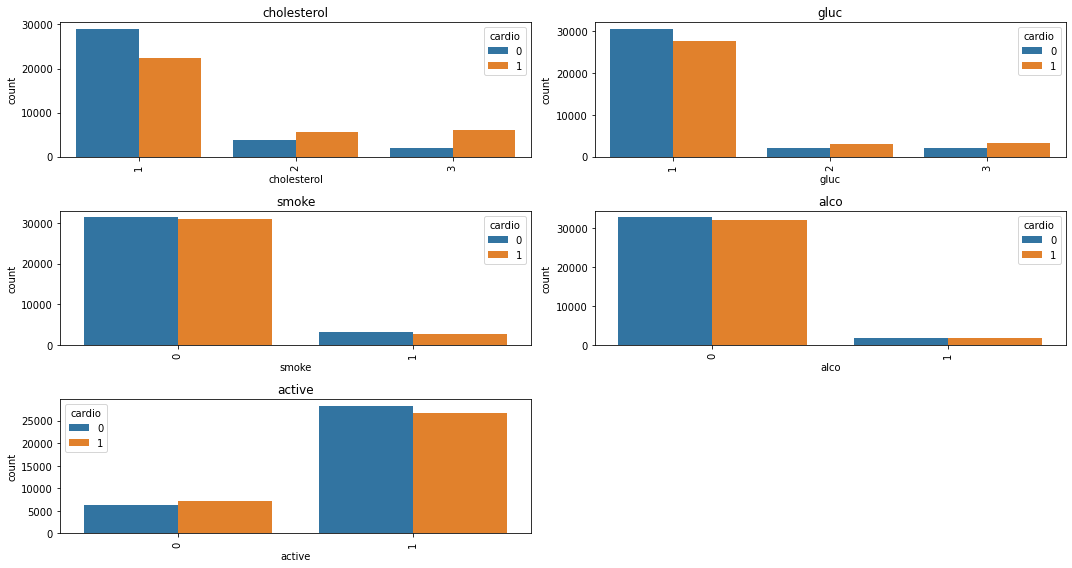

In [119]:
cols=['cholesterol', 'gluc', 'smoke', 'alco', 'active']
rows=3
columns=2
iterator=1
for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.countplot(df.loc[:,i],hue=df.cardio)
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
    

<AxesSubplot:>

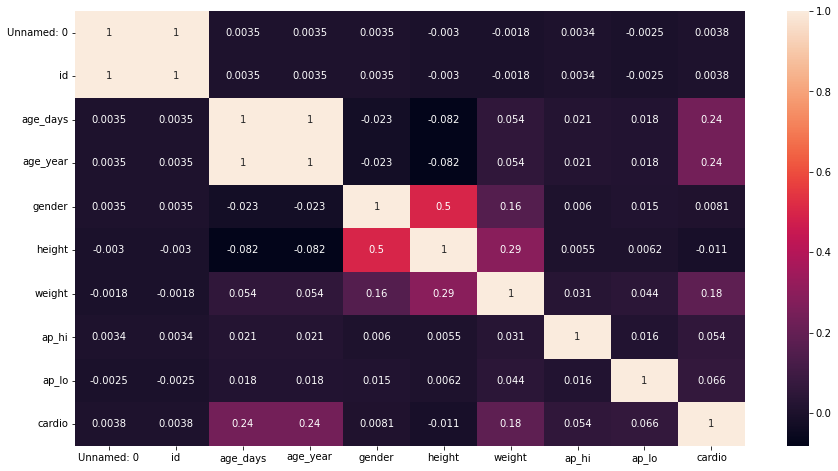

In [122]:
sns.heatmap(df.corr(),annot=True)